In [14]:
# Ejemplo mostrando cómo predecir con IsolationForest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [15]:
# Generar los datos simulados
n_samples = 100 # Número de muestras por grupo
n_outliers = 20 # Número de anomalías
rng = np.random.RandomState(42) # Semilla para la reproducibilidad

In [16]:
# Generar dos grupos normales con distribución gaussiana
# a las que se suma el array [2,2] o [-2,-2]
group_1 = rng.randn(n_samples, 2) + np.array([2, 2])
group_2 = rng.randn(n_samples, 2) + np.array([-2, -2])

In [17]:
group_1

array([[ 2.49671415,  1.8617357 ],
       [ 2.64768854,  3.52302986],
       [ 1.76584663,  1.76586304],
       [ 3.57921282,  2.76743473],
       [ 1.53052561,  2.54256004],
       [ 1.53658231,  1.53427025],
       [ 2.24196227,  0.08671976],
       [ 0.27508217,  1.43771247],
       [ 0.98716888,  2.31424733],
       [ 1.09197592,  0.5876963 ],
       [ 3.46564877,  1.7742237 ],
       [ 2.0675282 ,  0.57525181],
       [ 1.45561728,  2.11092259],
       [ 0.84900642,  2.37569802],
       [ 1.39936131,  1.70830625],
       [ 1.39829339,  3.85227818],
       [ 1.98650278,  0.94228907],
       [ 2.82254491,  0.77915635],
       [ 2.2088636 ,  0.04032988],
       [ 0.67181395,  2.19686124],
       [ 2.73846658,  2.17136828],
       [ 1.88435172,  1.6988963 ],
       [ 0.52147801,  1.28015579],
       [ 1.53936123,  3.05712223],
       [ 2.34361829,  0.23695984],
       [ 2.32408397,  1.61491772],
       [ 1.323078  ,  2.61167629],
       [ 3.03099952,  2.93128012],
       [ 1.16078248,

In [18]:
group_2

array([[-1.64221264, -1.43921547],
       [-0.91694876, -0.94619795],
       [-3.37766937, -2.93782504],
       [-1.48496473, -1.48621405],
       [-1.48495231,  1.85273149],
       [-1.42910949, -0.86443436],
       [-1.04599824, -1.34860875],
       [-2.31526924, -1.24103078],
       [-2.77282521, -2.23681861],
       [-2.48536355, -1.91812586],
       [ 0.31465857, -3.86726519],
       [-1.31373981, -3.61271587],
       [-2.47193187, -0.9110494 ],
       [-1.93571998, -3.07774478],
       [-2.71530371, -1.32040225],
       [-2.73036663, -1.78354141],
       [-1.95442816, -2.65160035],
       [ 0.14394409, -1.36608098],
       [-4.02514259, -1.81354569],
       [-2.66178646, -1.14756667],
       [-2.79252074, -2.11473644],
       [-1.49501272, -1.13424481],
       [-3.20029641, -2.33450124],
       [-2.47494531, -2.65332923],
       [-0.23454576, -1.59501829],
       [-3.26088395, -1.08213805],
       [ 0.1221562 , -0.96753474],
       [-3.51936997, -2.48423407],
       [-0.73308885,

In [19]:
# Generar algunos puntos anómalos con distribución uniforme
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

In [20]:
outliers

array([[-0.68144398, -1.81274342],
       [-3.54899603,  2.91777901],
       [ 2.50320807,  3.99774139],
       [ 3.9730947 ,  0.44345364],
       [ 2.15189932,  3.55812584],
       [ 2.79717913, -2.02121519],
       [-0.39564692, -2.96672468],
       [ 3.63240822,  0.84939708],
       [-2.17085756,  1.37360548],
       [ 0.94502592, -1.13469826],
       [-3.09153926,  1.37258556],
       [ 0.16246161,  2.17854713],
       [ 0.16130801,  2.817452  ],
       [ 0.41525471,  0.48750377],
       [ 3.01322882, -0.77213707],
       [-2.92787817, -3.76973859],
       [ 2.04109805,  0.96247641],
       [ 1.63263814, -2.29628671],
       [-2.9090282 , -3.88364267],
       [-1.19529953,  0.71934149]])

In [21]:
# Concatenar los datos
X = np.concatenate([group_1, group_2, outliers])

In [22]:
X

array([[ 2.49671415,  1.8617357 ],
       [ 2.64768854,  3.52302986],
       [ 1.76584663,  1.76586304],
       [ 3.57921282,  2.76743473],
       [ 1.53052561,  2.54256004],
       [ 1.53658231,  1.53427025],
       [ 2.24196227,  0.08671976],
       [ 0.27508217,  1.43771247],
       [ 0.98716888,  2.31424733],
       [ 1.09197592,  0.5876963 ],
       [ 3.46564877,  1.7742237 ],
       [ 2.0675282 ,  0.57525181],
       [ 1.45561728,  2.11092259],
       [ 0.84900642,  2.37569802],
       [ 1.39936131,  1.70830625],
       [ 1.39829339,  3.85227818],
       [ 1.98650278,  0.94228907],
       [ 2.82254491,  0.77915635],
       [ 2.2088636 ,  0.04032988],
       [ 0.67181395,  2.19686124],
       [ 2.73846658,  2.17136828],
       [ 1.88435172,  1.6988963 ],
       [ 0.52147801,  1.28015579],
       [ 1.53936123,  3.05712223],
       [ 2.34361829,  0.23695984],
       [ 2.32408397,  1.61491772],
       [ 1.323078  ,  2.61167629],
       [ 3.03099952,  2.93128012],
       [ 1.16078248,

In [23]:
# Entrenar el modelo de IsolationForest con los datos
clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X)

IsolationForest(max_samples=100, random_state=0)

In [24]:
# Hacer predicciones con el modelo entrenado
y_pred = clf.predict(X)

In [25]:
# 1 valores normales, -1 anomalías
y_pred

array([ 1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1])

Text(0, 0.5, 'y')

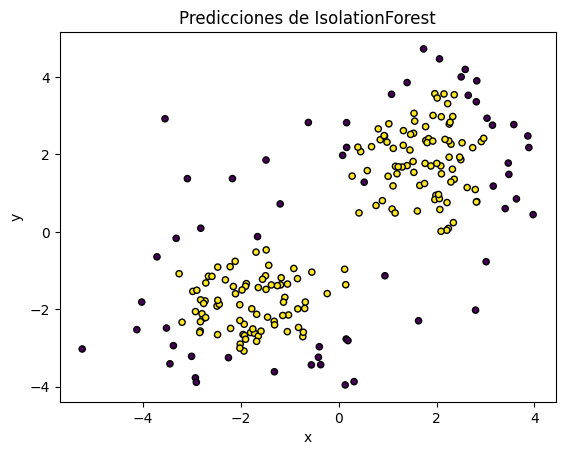

In [26]:
# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
plt.title('Predicciones de IsolationForest')
plt.xlabel('x')
plt.ylabel('y')